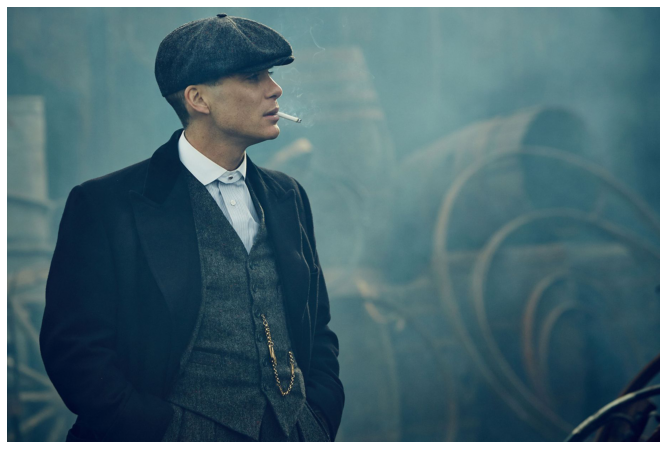

In [33]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# for dirname, _, filenames in os.walk('/home/gus-araujo/Documents/Programming/MAP-2210/Trabalho-final/map2210-final/images'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('/home/gus-araujo/Documents/Programming/MAP-2210/Trabalho-final/map2210-final/images/1087762.jpg'))
X = A[:,:,:] # Convert RGB to grayscale

# X = (X - X.mean()) / X.std()
X = (X - X.min()) / (X.max() - X.min())

# Explicar a necessidade da normalizacao: https://en.wikipedia.org/wiki/Normalization_(image_processing)

img = plt.imshow(X)
# img.set_cmap('gray')
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

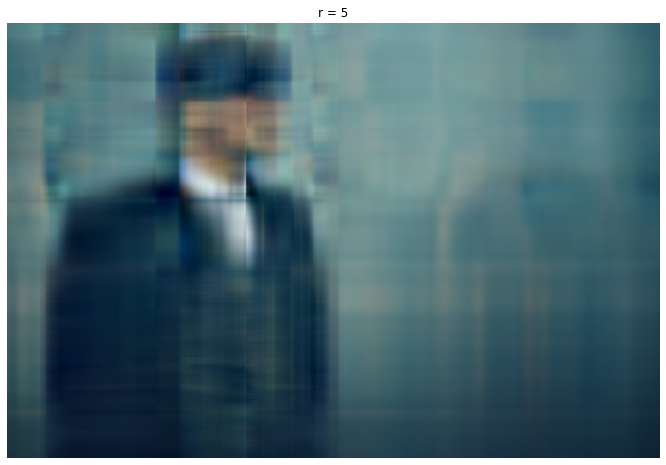

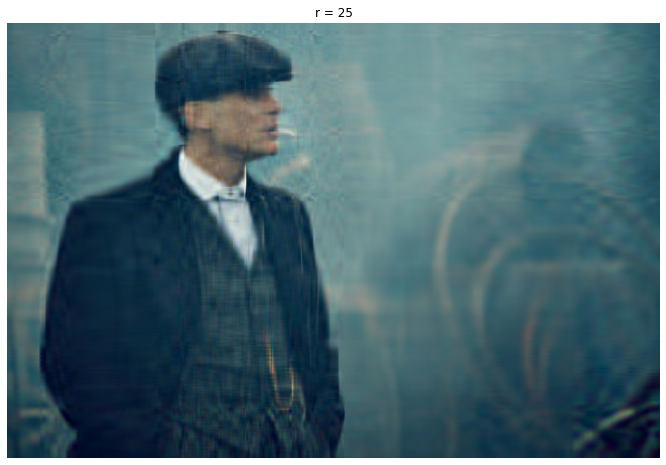

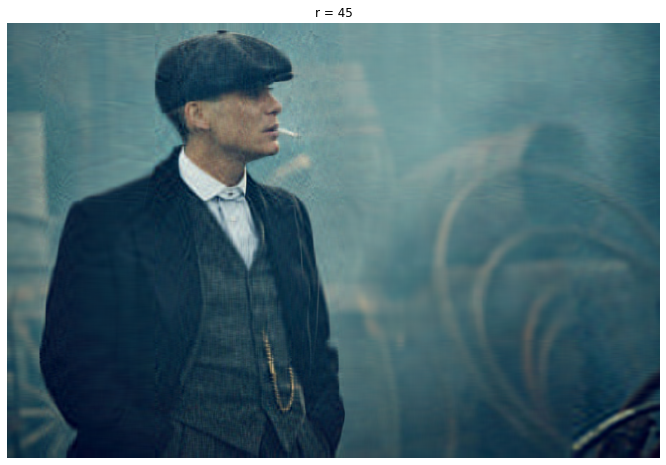

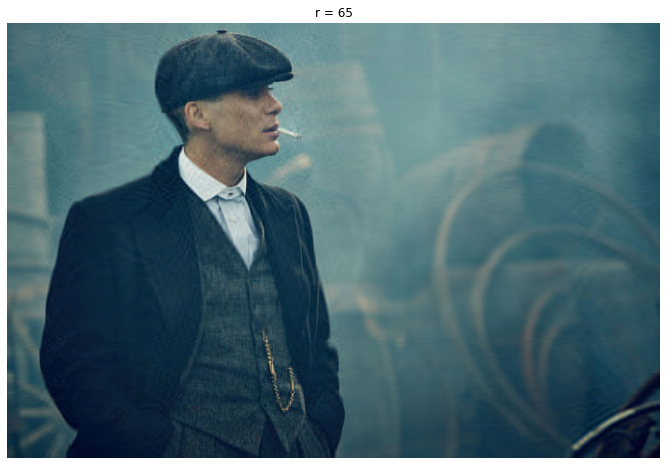

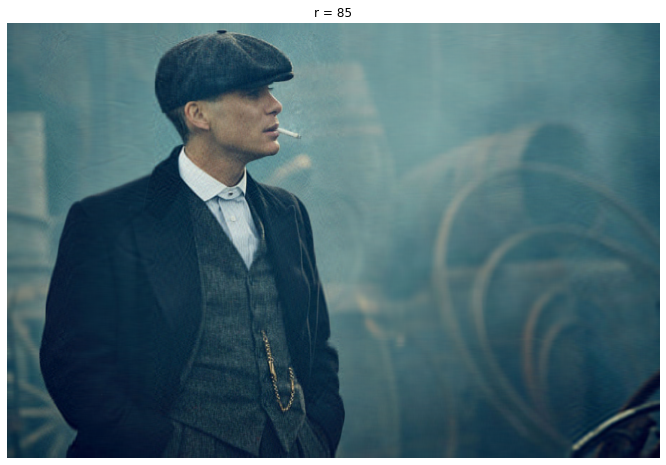

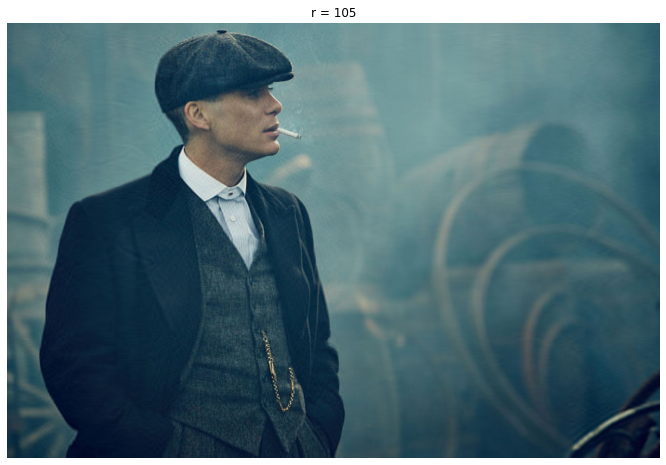

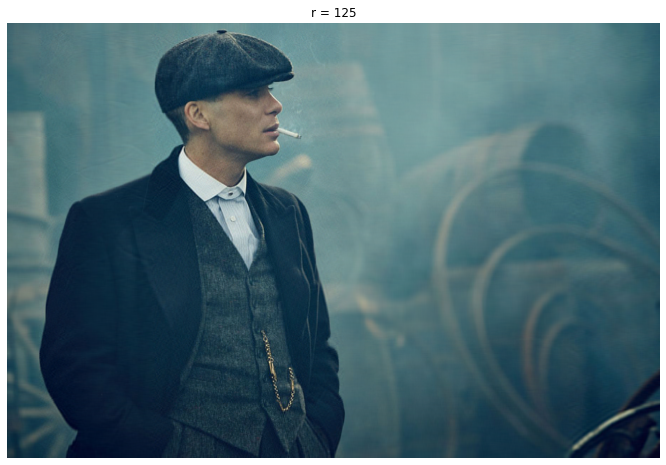

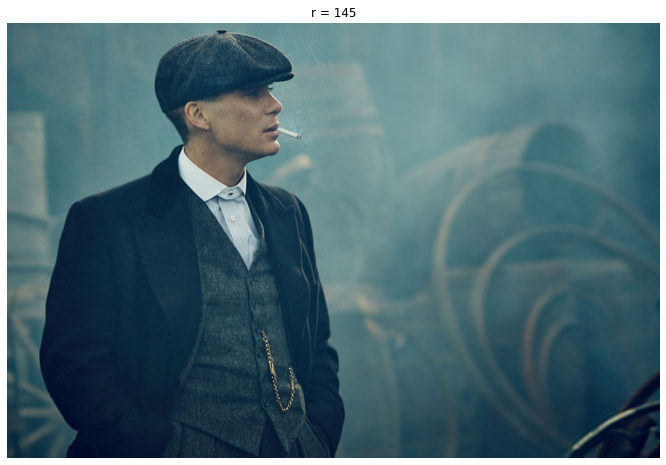

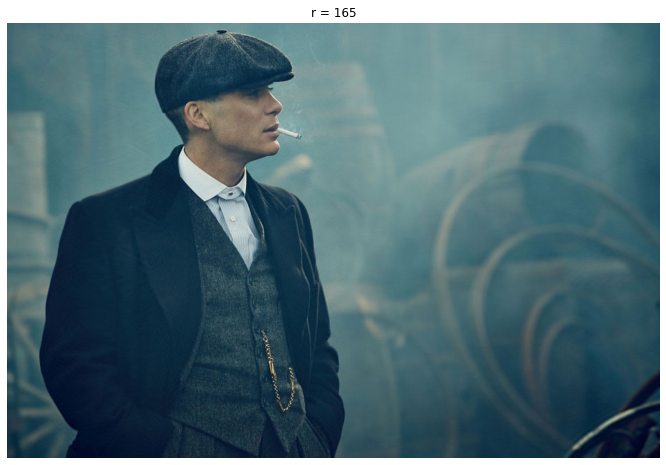

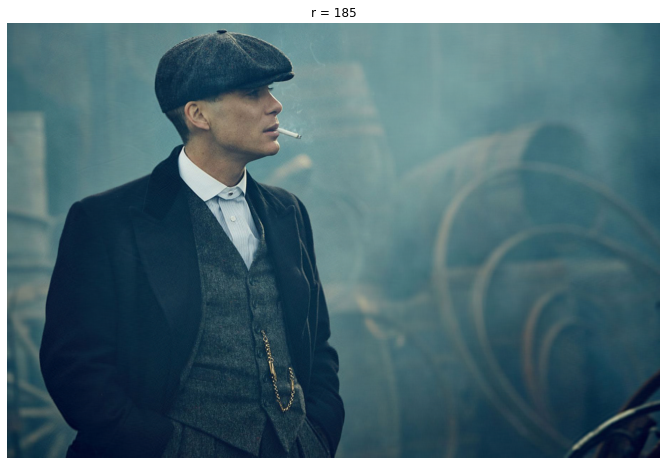

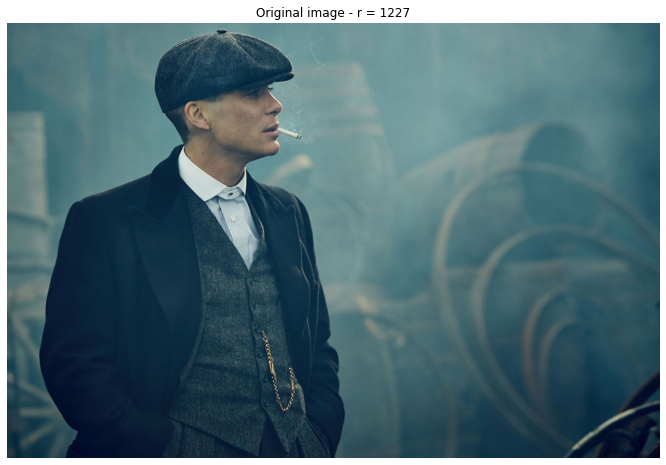

In [39]:
X0 = X[:, :, 0]
X1 = X[:, :, 1]
X2 = X[:, :, 2]


U0, S0, VT0 = np.linalg.svd(X0, full_matrices=False)
U1, S1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, VT2 = np.linalg.svd(X2, full_matrices=False)

# print(len(U))

S0 = np.diag(S0)
S1 = np.diag(S1)
S2 = np.diag(S2)

j = 0
for r in range(5, 200, 20):
    # Construct approximate image
    Xapprox1 = U0[:, :r] @ S0[0:r, :r] @ VT0[:r, :]
    Xapprox2 = U1[:, :r] @ S1[0:r, :r] @ VT1[:r, :]
    Xapprox3 = U2[:, :r] @ S2[0:r, :r] @ VT2[:r, :]

    Xapprox = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    Xapprox[:,:,0] = Xapprox1
    Xapprox[:,:,1] = Xapprox2
    Xapprox[:,:,2] = Xapprox3

    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    # img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

plt.title('Original image - r = ' + str(A.shape[0]))
plt.axis('off')
plt.imshow(A)


34861.322553232116
               0
0     431.450620
1      87.223704
2      65.734547
3      46.458347
4      40.102501
...          ...
1222    0.013568
1223    0.013464
1224    0.013288
1225    0.012950
1226    0.012376

[1227 rows x 1 columns]


AttributeError: 'AxesSubplot' object has no attribute 'fig'

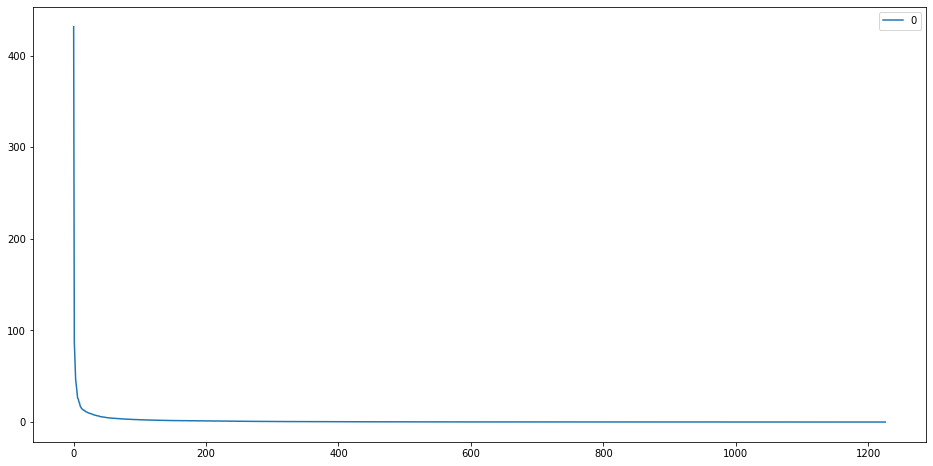

In [53]:
## f_ch01_ex02_2

import seaborn as sns
import pandas as pd

S = S0

print(np.diag(S)[0]/np.diag(S)[len(S)-1])

# plt.figure(1)
# plt.semilogy(np.diag(S))
# plt.title('Singular Values')
# plt.show()
#
# plt.figure(2)
# plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
# plt.title('Singular Values: Cumulative Sum')
# plt.show()

df = pd.DataFrame(np.diag(S))

print(df)

g = sns.lineplot(data=df)
g.fig.autofmt_xdate()

In [30]:
# plt.figure(1)
# plt.semilogy(np.diag(S))
# plt.title('Singular Values')
# plt.show()
#
# plt.figure(2)
# plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
# plt.title('Singular Values: Cumulative Sum')
# plt.show()